In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
import random

# prepare data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [3]:
unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

In [4]:
x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

In [5]:
# examples of categorical crossentropy
cce = keras.losses.CategoricalCrossentropy()

# a labeled data from the second class
y_true = [[0, 1, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# an ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# another ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.1, 0.4, 0.3, 0.2]]
print(cce(y_true, y_pred).numpy())

0.051293306
0.0
0.0


In [6]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

In [8]:
# define model
regularizer=keras.regularizers.l2(1e-3)
inputs = keras.layers.Input(shape=x_train[0].shape)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(inputs)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)


x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)

x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten(input_shape=x_train[0].shape)(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)
output = keras.layers.Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer)(x)

model = keras.Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0     

In [9]:
# compile model

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    
                    )

Epoch 1/10
4/4 [==============================] - 7s 649ms/step - loss: 97.9024 - accuracy: 0.0861 - val_loss: 84.8443 - val_accuracy: 0.1021
Epoch 2/10
4/4 [==============================] - 1s 368ms/step - loss: 82.4286 - accuracy: 0.0929 - val_loss: 68.9029 - val_accuracy: 0.1241
Epoch 3/10
4/4 [==============================] - 1s 369ms/step - loss: 61.5879 - accuracy: 0.1250 - val_loss: 23.4807 - val_accuracy: 0.1112
Epoch 4/10
4/4 [==============================] - 1s 363ms/step - loss: 25.5104 - accuracy: 0.1232 - val_loss: 14.0444 - val_accuracy: 0.1032
Epoch 5/10
4/4 [==============================] - 1s 371ms/step - loss: 12.9723 - accuracy: 0.1568 - val_loss: 8.0908 - val_accuracy: 0.1027
Epoch 6/10
4/4 [==============================] - 1s 395ms/step - loss: 7.2216 - accuracy: 0.1003 - val_loss: 5.6932 - val_accuracy: 0.1141
Epoch 7/10
4/4 [==============================] - 1s 370ms/step - loss: 5.4374 - accuracy: 0.1006 - val_loss: 4.6274 - val_accuracy: 0.1386
Epoch 8/10


In [10]:
new_x_train = []
new_y_train = []
for i in range(len(x_unlabeld)):
  
  new_x_train.append(x_unlabeld[i])
  new_y_train.append(0)
  rot90 = tf.image.rot90(x_unlabeld[i], k=1)
  new_x_train.append(rot90)
  new_y_train.append(1)
  rot180 = tf.image.rot90(x_unlabeld[i], k=2)
  new_x_train.append(rot180)
  new_y_train.append(2)
  rot270 = tf.image.rot90(x_unlabeld[i], k=3)
  new_x_train.append(rot270)
  new_y_train.append(3)

In [11]:
new_x_train = np.asarray(new_x_train)
new_y_train = np.asarray(new_y_train)
print(new_x_train.shape)
print(new_y_train.shape)

(199200, 32, 32, 3)
(199200,)


In [12]:
# Convert class vectors to binary class matrices.

new_y_train = keras.utils.to_categorical(new_y_train, 4)


In [13]:
# define model
regularizer=keras.regularizers.l2(1e-3)
inputs = keras.layers.Input(shape=new_x_train[0].shape)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(inputs)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)

x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)

x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten(input_shape=new_x_train[0].shape)(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)
output = keras.layers.Dense(units=4, activation='softmax', kernel_regularizer=regularizer)(x)

rotation_model = keras.Model(inputs, output)
rotation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0   

In [14]:
 # compile model
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
rotation_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# train model
history_rotation = rotation_model.fit(new_x_train, new_y_train,
                    batch_size=256,
                    epochs=10,
                    shuffle=True,
                    validation_split = 0.2,

                    )

Epoch 1/10
623/623 [==============================] - 20s 31ms/step - loss: 6.0771 - accuracy: 0.3308 - val_loss: 2.0112 - val_accuracy: 0.5515
Epoch 2/10
623/623 [==============================] - 19s 30ms/step - loss: 1.9250 - accuracy: 0.5572 - val_loss: 1.5759 - val_accuracy: 0.6387
Epoch 3/10
623/623 [==============================] - 19s 30ms/step - loss: 1.5550 - accuracy: 0.6159 - val_loss: 1.2965 - val_accuracy: 0.6807
Epoch 4/10
623/623 [==============================] - 19s 30ms/step - loss: 1.3171 - accuracy: 0.6521 - val_loss: 1.2087 - val_accuracy: 0.6681
Epoch 5/10
623/623 [==============================] - 19s 30ms/step - loss: 1.1539 - accuracy: 0.6849 - val_loss: 1.0208 - val_accuracy: 0.7253
Epoch 6/10
623/623 [==============================] - 19s 30ms/step - loss: 1.0561 - accuracy: 0.7086 - val_loss: 0.9815 - val_accuracy: 0.7335
Epoch 7/10
623/623 [==============================] - 19s 30ms/step - loss: 0.9906 - accuracy: 0.7266 - val_loss: 0.9676 - val_accuracy:

In [15]:
# rotation_model.summary()
# rotation_model.layers.pop()
# ratate_model.layers.pop()
# rotation_model.summary()



In [16]:
rotation_model.trainable = False
output_clf = keras.layers.Dense(units=num_classes, activation='softmax')(rotation_model.layers[-2].output)
clf_model = keras.Model(inputs, output_clf)
clf_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0   

In [17]:
# output_clf = keras.layers.Dense(units=num_classes, activation='softmax')(d1)

# clf_model = keras.Model(input, output_clf)
# clf_model.summary()

In [18]:
 # compile model
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
clf_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# train model
history_clf = clf_model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    
                    )

Epoch 1/50
4/4 [==============================] - 1s 338ms/step - loss: 5.3988 - accuracy: 0.1203 - val_loss: 3.9543 - val_accuracy: 0.1587
Epoch 2/50
4/4 [==============================] - 1s 242ms/step - loss: 3.6354 - accuracy: 0.2418 - val_loss: 4.3322 - val_accuracy: 0.2416
Epoch 3/50
4/4 [==============================] - 1s 246ms/step - loss: 3.3550 - accuracy: 0.3749 - val_loss: 2.9156 - val_accuracy: 0.2977
Epoch 4/50
4/4 [==============================] - 1s 248ms/step - loss: 2.2136 - accuracy: 0.4367 - val_loss: 3.2219 - val_accuracy: 0.3201
Epoch 5/50
4/4 [==============================] - 1s 246ms/step - loss: 2.0995 - accuracy: 0.4955 - val_loss: 2.6957 - val_accuracy: 0.3616
Epoch 6/50
4/4 [==============================] - 1s 249ms/step - loss: 1.7972 - accuracy: 0.5539 - val_loss: 2.7551 - val_accuracy: 0.3708
Epoch 7/50
4/4 [==============================] - 1s 245ms/step - loss: 1.6560 - accuracy: 0.5517 - val_loss: 2.6495 - val_accuracy: 0.3671
Epoch 8/50
4/4 [====

In [19]:
zeros10 = np.zeros((10,), dtype=np.float32)
zeros10

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
new_x_train = []
new_y_train = []
for i in range(len(x_unlabeld)):
#   k = np.random.randint(4, size=1)[0]
#   if k == 0:
    new_x_train.append(x_unlabeld[i])
    new_y_train.append(0)
#   else:
    rot90 = tf.image.rot90(x_unlabeld[i], k=1)
    new_x_train.append(rot90)
    new_y_train.append(1)
    rot180 = tf.image.rot90(x_unlabeld[i], k=2)
    new_x_train.append(rot180)
    new_y_train.append(2)
    rot270 = tf.image.rot90(x_unlabeld[i], k=3)
    new_x_train.append(rot270)
    new_y_train.append(3)

In [21]:
new_x_train = np.asarray(new_x_train)
new_y_train = np.asarray(new_y_train)
print(new_x_train.shape)
print(new_y_train.shape)

(199200, 32, 32, 3)
(199200,)


In [22]:
# Convert class vectors to binary class matrices.

new_y_train = keras.utils.to_categorical(new_y_train, 4)


In [23]:
x_train_rotated = []
y_train_rotated = []
y_train_unrotated = []
for i in range(len(x_train)):
#   k = np.random.randint(4, size=1)[0]
#   if k==0:
    x_train_rotated.append(x_train[i])
    y_train_rotated.append(0)
    y_train_unrotated.append(y_train[i])
#   else:
    rot = tf.image.rot90(x_train[i], k=1)
    x_train_rotated.append(rot)
    y_train_rotated.append(1)
    y_train_unrotated.append(y_train[i])
    rot180 = tf.image.rot90(x_train[i], k=2)
    x_train_rotated.append(rot180)
    y_train_rotated.append(2)
    y_train_unrotated.append(y_train[i])
    rot270 = tf.image.rot90(x_train[i], k=3)
    x_train_rotated.append(rot270)
    y_train_rotated.append(3)
    y_train_unrotated.append(y_train[i])

In [24]:
# Convert class vectors to binary class matrices.

y_train_rotated = keras.utils.to_categorical(y_train_rotated, 4)


In [25]:
y_train_rotated[-1]

array([0., 0., 0., 1.], dtype=float32)

In [26]:
x_train_rotated = np.asarray(x_train_rotated)
y_train_rotated = np.asarray(y_train_rotated)
y_train_unrotated = np.asarray(y_train_unrotated)
print(x_train_rotated.shape)
print(y_train_rotated.shape)
print(y_train_unrotated.shape)

(800, 32, 32, 3)
(800, 4)
(800, 10)


In [27]:
multi_x_train = []
multi_y1_train = []
multi_y2_train = []
for i in range(len(new_x_train)):
    multi_x_train.append(new_x_train[i])
    multi_y1_train.append(zeros10)
    multi_y2_train.append(new_y_train[i])
    
for i in range(len(x_train_rotated)):
    multi_x_train.append(x_train_rotated[i])
    multi_y1_train.append(y_train_unrotated[i])
    multi_y2_train.append(y_train_rotated[i])

In [28]:
multi_x_train = np.asarray(multi_x_train)
multi_y1_train = np.asarray(multi_y1_train, dtype=np.float32)
multi_y2_train = np.asarray(multi_y2_train, dtype=np.float32)
print(multi_x_train.shape)
print(multi_y1_train.shape)
print(multi_y2_train.shape)

(200000, 32, 32, 3)
(200000, 10)
(200000, 4)


In [29]:
zeros4 = np.zeros((4,), dtype=np.float32)
y_test_rotate = [zeros4 for _ in range(len(y_test))]
y_test_rotate = np.asarray(y_test_rotate)

In [30]:
input = keras.Input(shape=multi_x_train[0].shape, name="image")
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(input)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)

out_a = keras.layers.Dense(10, activation='softmax', name='classification')(x)
out_b = keras.layers.Dense(4, activation='softmax', name='rotation')(x)


encoder = keras.Model( inputs = input, outputs = [out_a, out_b], name="encoder")

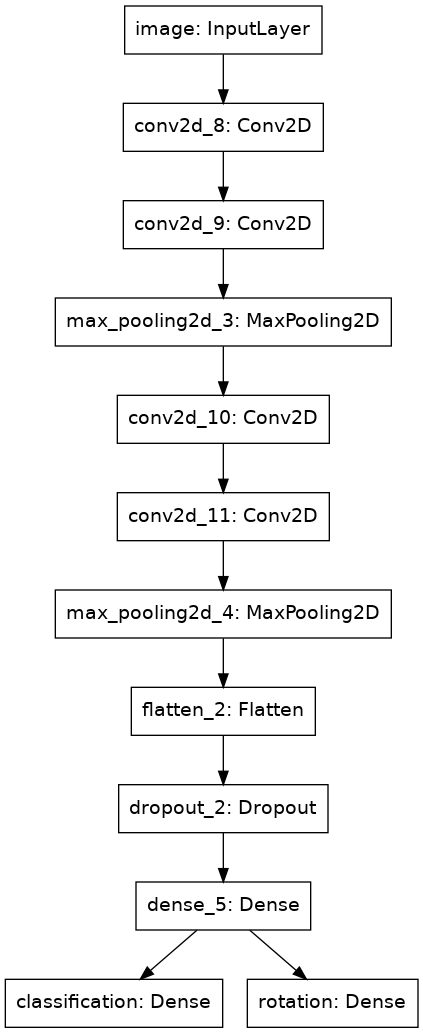

In [31]:
# Let's plot 
keras.utils.plot_model(
    encoder
)

In [32]:
encoder.compile(
    loss = {
        "classification": tf.keras.losses.CategoricalCrossentropy(),
        "rotation": tf.keras.losses.CategoricalCrossentropy()
        
    },

    metrics = {
        "classification": 'accuracy',
        "rotation": 'accuracy'
    
    },

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss_weights = {"classification": 1e-6, "rotation": 1.0}
)

In [33]:
encoder_history = encoder.fit(x=multi_x_train,
    y={"classification": multi_y1_train, "rotation": multi_y2_train},
    validation_data=(x_test,
        {"classification": y_test, "rotation": y_test_rotate}),
    # validation_split=0.2,
    batch_size=256,
    epochs=10,
    shuffle = True,          
    )

Epoch 1/10
782/782 [==============================] - 24s 30ms/step - loss: 4.7148 - classification_loss: 0.0121 - rotation_loss: 3.5064 - classification_accuracy: 0.0412 - rotation_accuracy: 0.3921 - val_loss: 0.8510 - val_classification_loss: 2.4845 - val_rotation_loss: 0.0000e+00 - val_classification_accuracy: 0.1070 - val_rotation_accuracy: 0.6838
Epoch 2/10
782/782 [==============================] - 23s 29ms/step - loss: 1.7090 - classification_loss: 0.0105 - rotation_loss: 0.9495 - classification_accuracy: 0.0453 - rotation_accuracy: 0.6030 - val_loss: 0.5421 - val_classification_loss: 2.3457 - val_rotation_loss: 0.0000e+00 - val_classification_accuracy: 0.1279 - val_rotation_accuracy: 0.7638
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 1.3314 - classification_loss: 0.0092 - rotation_loss: 0.8361 - classification_accuracy: 0.0483 - rotation_accuracy: 0.6567 - val_loss: 0.3820 - val_classification_loss: 2.3852 - val_rotation_loss: 0.0000e+00 - val_cl

In [59]:
# define model
regularizer=keras.regularizers.l2(1e-3)
inputs = keras.layers.Input(shape=multi_x_train[0].shape)

x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(inputs)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)
output1 = keras.layers.Dense(units=10, activation='softmax', name='classification_output')(x)
output2 = keras.layers.Dense(units=4, activation='softmax', name='rotation_output')(x)

model = keras.Model(
            inputs=inputs,
            outputs=[output1, output2],
            )



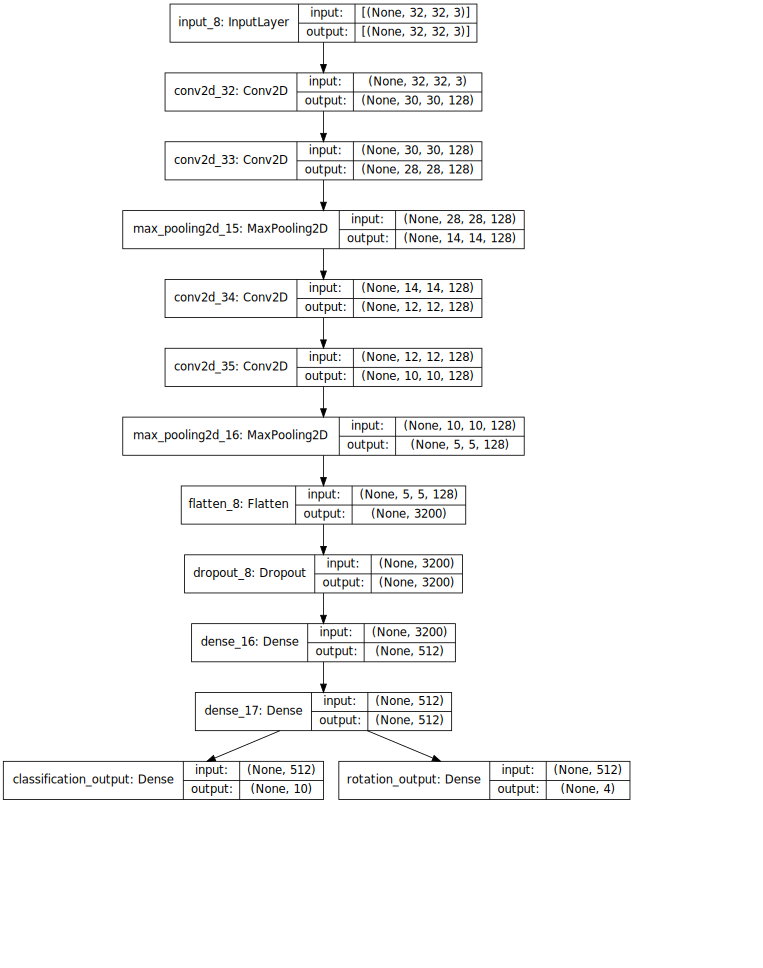

In [60]:
from IPython.display import SVG

SVG(tf.keras.utils.model_to_dot(model,show_shapes= True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))

In [61]:
losses = {
    "classification_output": "categorical_crossentropy",
    "rotation_output": "categorical_crossentropy",
}

lossWeights = {"classification_output": 0.000001, "rotation_output":1.0 }
learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=782,
#     decay_rate=0.8,
#     staircase=True)
epochs = 10
opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
    metrics=["accuracy"])

    

In [62]:
zeros4 = np.zeros((4,), dtype=np.float32)
y_test_rotate = [zeros4 for _ in range(len(y_test))]
y_test_rotate = np.asarray(y_test_rotate)

In [63]:
H = model.fit(x=multi_x_train,
    y={"classification_output": multi_y1_train, "rotation_output": multi_y2_train},
    validation_data=(x_test,
        {"classification_output": y_test, "rotation_output": y_test_rotate}),
    # validation_split=0.2,
    batch_size=256,
    epochs=epochs,
    shuffle = True,          
    )

Epoch 1/10
782/782 [==============================] - 24s 30ms/step - loss: 4.2990 - classification_output_loss: 0.0119 - rotation_output_loss: 2.6229 - classification_output_accuracy: 0.1238 - rotation_output_accuracy: 0.4065 - val_loss: 1.1493 - val_classification_output_loss: 2.3030 - val_rotation_output_loss: 0.0000e+00 - val_classification_output_accuracy: 0.1341 - val_rotation_output_accuracy: 0.4060
Epoch 2/10
782/782 [==============================] - 23s 30ms/step - loss: 1.9322 - classification_output_loss: 0.0095 - rotation_output_loss: 0.9148 - classification_output_accuracy: 0.2003 - rotation_output_accuracy: 0.6201 - val_loss: 0.7018 - val_classification_output_loss: 2.3857 - val_rotation_output_loss: 0.0000e+00 - val_classification_output_accuracy: 0.0884 - val_rotation_output_accuracy: 0.7804
Epoch 3/10
782/782 [==============================] - 23s 30ms/step - loss: 1.4244 - classification_output_loss: 0.0100 - rotation_output_loss: 0.7893 - classification_output_accur